# Importiere benötigte Bibliotheken

In [8]:
import pandas as pd
import numpy as np
import ast
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
import sys
import csv

csv.field_size_limit(sys.maxsize)



pd.set_option('display.max_colwidth', 50)

# Importiere das Datenset

In [10]:
#dataset = pd.read_csv("./jupyterTestFrame.csv")

#Vollständiges Datenset
dataset = pd.read_csv("./frame_v3_negativeSamples.csv", engine='python')


# Zeige die ersten 5 Zeilen des Datensets
dataset.head() # Alternative: print(dataset.head())

,patent_application_id,patent_citation_id,original_cited_patent_dnum,original_cited_patent_docNumber,original_cited_patent_country,application_claim_text,application_claim_number,extracted_paragraph_column_of_citation,actual_used_patent_dnum_application_number_for_paragraph_extraction,novelty_reducing_paragraphs
0,2501127A120120919,2501127A120120919_0004,EP2037676A1,2037676,EP,<claim-text>A method for controlling the exec...,1,"<p id=""p0006"" num=""0006"">Referring to <figref...",2037676,"['6', ' 7', ' 8', ' 9', ' 10', ' 11', ' 12', '..."
1,2501127A120120919,2501127A120120919_0004,EP2037676A1,2037676,EP,<claim-text>A method according to claim 1 whe...,2,"<p id=""p0006"" num=""0006"">Referring to <figref...",2037676,"['6', ' 7', ' 8', ' 9', ' 10', ' 11', ' 12', '..."
2,2501127A120120919,2501127A120120919_0004,EP2037676A1,2037676,EP,<claim-text>A method according to claim 2 whe...,3,"<p id=""p0006"" num=""0006"">Referring to <figref...",2037676,"['6', ' 7', ' 8', ' 9', ' 10', ' 11', ' 12', '..."
3,2501127A120120919,2501127A120120919_0004,EP2037676A1,2037676,EP,<claim-text>A method according to any of clai...,4,"<p id=""p0006"" num=""0006"">Referring to <figref...",2037676,"['6', ' 7', ' 8', ' 9', ' 10', ' 11', ' 12', '..."
4,2501127A120120919,2501127A120120919_0004,EP2037676A1,2037676,EP,<claim-text>A method according to any of clai...,5,"<p id=""p0006"" num=""0006"">Referring to <figref...",2037676,"['6', ' 7', ' 8', ' 9', ' 10', ' 11', ' 12', '..."


# Allgemeine Statistiken

### Größe des Datensets (Anzahl Zeilen)

In [11]:
len(dataset.index)

232675

### Einzigartige Einträge pro Spalte

[]

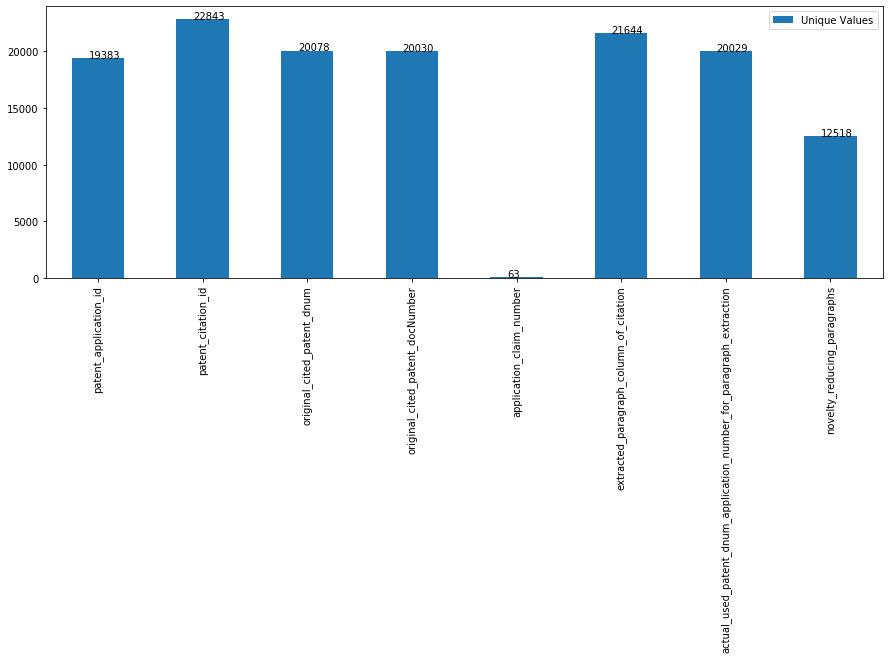

In [12]:
plotdata = [len(dataset.patent_application_id.unique()),
len(dataset.patent_citation_id.unique()),
len(dataset.original_cited_patent_dnum.unique()),
len(dataset.original_cited_patent_docNumber.unique()),
# len(dataset.original_cited_patent_country.unique()), # alles gleich, Achtung: Diese Spalte ist nicht sonderlich aussagekräftig, da sich exakte Aufzählungen wiederholen müssen
# len(dataset.application_claim_text.unique()), # fast alles unique, Achtung: Diese Spalte ist nicht sonderlich aussagekräftig, da sich exakte Aufzählungen wiederholen müssen
len(dataset.application_claim_number.unique()),
len(dataset.extracted_paragraph_column_of_citation.unique()),	
len(dataset.actual_used_patent_dnum_application_number_for_paragraph_extraction.unique()),	
len(dataset.novelty_reducing_paragraphs.unique())] # Achtung: Diese Spalte ist nicht sonderlich aussagekräftig, da sich exakte Aufzählungen wiederholen müssen

# all_labels = ['patent_application_id', 'patent_citation_id', 'original_cited_patent_dnum','original_cited_patent_docNumber','original_cited_patent_country','application_claim_text','application_claim_number','extracted_paragraph_column_of_citation','actual_used_patent_dnum_application_number_for_paragraph_extraction','novelty_reducing_paragraphs']
labels = ['patent_application_id', 'patent_citation_id', 'original_cited_patent_dnum','original_cited_patent_docNumber','application_claim_number','extracted_paragraph_column_of_citation','actual_used_patent_dnum_application_number_for_paragraph_extraction','novelty_reducing_paragraphs']

data = pd.DataFrame(plotdata, index=labels, columns=['Unique Values'])

ax = data.plot(kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata), int(max(plotdata)/10)),figsize=(15,5))               
                                              
# Annotiere die Balken zusätzlich mit ihren jeweiligen Werten als Label
for i, label in enumerate(list(data.index)):
               sum = data.loc[label]['Unique Values']
               ax.annotate(str(sum), (i-0.09, sum+1.5))
            

ax.plot(figsize=(10,50))


### Anzahl der neuheitsschädlichen Paragraphen in 'novelty_reducing_paragraphs' vs. Anzahl der extrahierten Paragraphen in 'extracted_paragraph_column_of_citation'

In [14]:
# Zähle neuheitsschädliche Paragraphen in Liste
counting_novelty_reducing_paragraphs=defaultdict(int)
for element in dataset.novelty_reducing_paragraphs.apply(ast.literal_eval):
    counting_novelty_reducing_paragraphs[len(element)] += 1

#print(counting_novelty_reducing_paragraphs)
sorted_counting_novelty_reducing_paragraphs=[(k,counting_novelty_reducing_paragraphs[k]) for k in sorted(counting_novelty_reducing_paragraphs)]
#print(sorted_counting_novelty_reducing_paragraphs)

#ACHTUNG: LÖSCHE HIER FEHLERHAFTEN WERT, DA ER BALKENDIAGRAMM ZERSCHIEßT!!!!
#sorted_counting_novelty_reducing_paragraphs.remove((404520,6))
#ACHTUNG: LÖSCHE HIER FEHLERHAFTEN WERT, DA ER BALKENDIAGRAMM ZERSCHIEßT!!!!


# Zähle Anzahl tatsächlich extrahierter Paragraphen
counting_extracted_paragraph_column_of_citation=defaultdict(int)
for row in dataset.extracted_paragraph_column_of_citation:
    row_count=row.count("<p id")
    counting_extracted_paragraph_column_of_citation[row_count] += 1

#print(counting_extracted_paragraph_column_of_citation)
#print([(k, counting_extracted_paragraph_column_of_citation[k]) for k in sorted(counting_extracted_paragraph_column_of_citation, key=counting_extracted_paragraph_column_of_citation.get, reverse=False)])
sorted_counting_extracted_paragraph_column_of_citation=[(k,counting_extracted_paragraph_column_of_citation[k]) for k in sorted(counting_extracted_paragraph_column_of_citation)]

#print(sorted_counting_extracted_paragraph_column_of_citation)








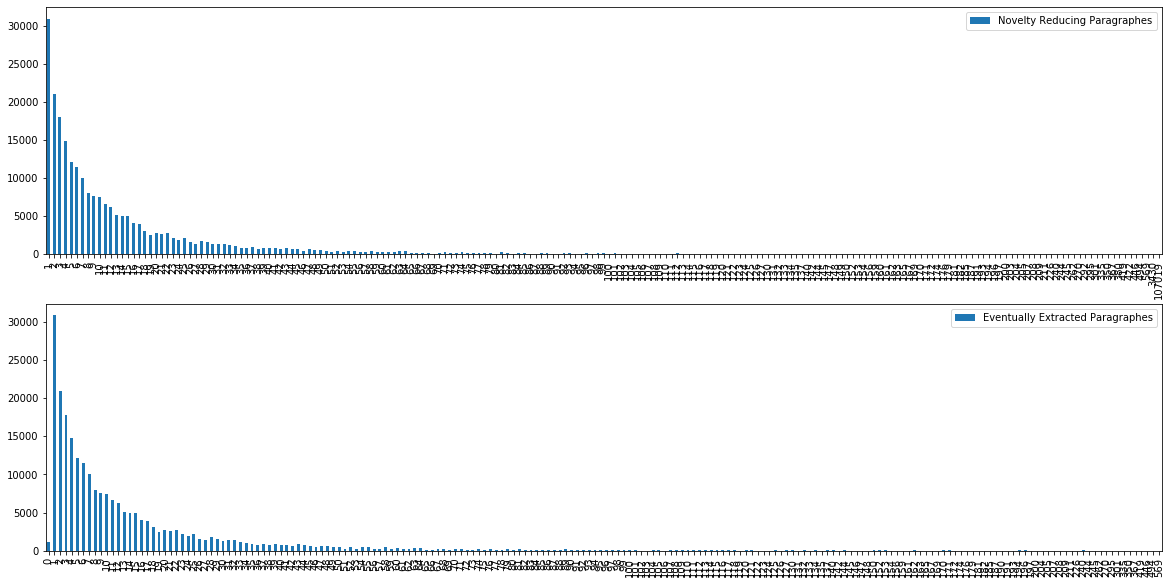

In [15]:
######################## Plot1 für novelty reducing ########################

labels = [i[0] for i in sorted_counting_novelty_reducing_paragraphs]
plotdata = [i[1] for i in sorted_counting_novelty_reducing_paragraphs]
labels2 = [i[0] for i in sorted_counting_extracted_paragraph_column_of_citation]
plotdata2 = [i[1] for i in sorted_counting_extracted_paragraph_column_of_citation]


data = pd.DataFrame(plotdata, index=labels, columns=['Novelty Reducing Paragraphes'])
#ax = data.plot(kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata), int(max(plotdata)/10)),figsize=(15,5))               


data2 = pd.DataFrame(plotdata2, index=labels2, columns=['Eventually Extracted Paragraphes'])
#ax2 = data.plot(kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata2), int(max(plotdata2)/10)),figsize=(15,5))               
                  
# Annotiere die Balken zusätzlich mit ihren jeweiligen Werten als Label
#for i, label in enumerate(list(data.index)):
  #  sum = data.loc[label]['Novelty Reducing Paragraphes']
 #   ax.annotate(str(sum), (i-1, sum+1))


fig = plt.figure()


ax = fig.add_subplot(2,1,1)
data.plot(ax=ax,kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata), int(max(plotdata)/10)),figsize=(20,10))               
#plt.title('A tale of 2 subplots')
#plt.ylabel('Damped oscillation')

ax2 = fig.add_subplot(2,1,2)
data2.plot(ax=ax2,kind="bar",use_index=True, rot=90, xticks=range(0,max(plotdata2), int(max(plotdata2)/10)),figsize=(20,10))               
#plt.xlabel('time (s)')
#plt.ylabel('Undamped')









# Funktionsdefinition

In [ ]:
def groupByQuery(eintrag,eintrag_spalte):
    return dataset.groupby(eintrag_spalte).get_group(eintrag)  

# Beispiele für die Datenexploration

## Liefere alle Einträge zu einem Patentantrag (oder einem anderen Eintrag)
#### Konkret: Liefere mir alle Spalten, die zum Patentantrag '2500486A120120919' (patent_application_id) gehören.

In [ ]:
# groupbyQuery(eintrag, eintrag_spalte) ist eine Funktion, die unser Datenset nach einer Spalte gruppiert, deren Namen in 
# "eintrag_spalte" übergeben wird. Anschließend werden nur jene Zeilen ausgegeben, die in der Spalte die Variable "eintrag" enthalten.
# Ein Beispiel:
result = groupByQuery("2500486", "original_cited_patent_docNumber")
print(result)

In [ ]:
# Mit"result = ...." speichern wir das Ergebnis in ein Objekt, dass wir weiterverwenden können. 
# Zum Beispiel können wir nun das Ergebnis ausgeben mit print(result).  
# Möchten wir nicht alle Spalten in unserer Ausgabe erhalten, so können wir unser Ergebnis 
# kürzen. 
my_selected_columns = result[["patent_application_id","patent_citation_id","extracted_paragraph_column_of_citation"]]
print(my_selected_columns)

In [ ]:
# Dies funktioniert natürlich auch für das ursprüngliche Datenset
another_selected_columns = result[["patent_application_id","application_claim_text","extracted_paragraph_column_of_citation","novelty_reducing_paragraphs"]]
print(another_selected_columns)

In [ ]:
# Da Werte, wie z.B. die extrahierten Paragraphen oft zu lang sind für eine gute Darstellung, werden Sie abgeschnitten.
# Dies kann abgestellt werden mit folgender Option
pd.set_option('display.max_colwidth', -1)
# Wenn wir uns nun die letzte Ausgabe erneut anzeigen:
print(another_selected_columns)

## Auswahl von Zeilen mit Zeilennummerierung (Index)

In [ ]:
# Da dies immer noch sehr übersichtlich ist, wollen wir nun nur die erste Zeile des Ergebnis
print(another_selected_columns.iloc[0])

In [ ]:
# Oder z.B. die zweite bis vierte Zeile mithilfe der Syntax iloc[Anfang:Ende]. Beachte dabei, dass wir bei 0 
# anfangen zu zählen und das Ende-1 ausgegeben wird. Haben wir also die Zeilen 0,1,2,3,4 gibt [1:4] uns die 
# Zeilen mit dem Index 1,2,3 aus (umgangssprachlich die zweite bis vierte Zeile).
auswahl = another_selected_columns.iloc[1:4]
# Zur besseren Übersicht, schalten wir die Kurzansicht wieder ein
pd.set_option('display.max_colwidth', 50)
# Und lassen uns die Ausgabe nochmals anzeigen
print(auswahl)

In [ ]:
# Wir können auch in einzelnen Zellen suchen und uns etwaige Zeilen ausgeben lassen
# Syntax datenobject[datenobject[Spalte in der ich suche].str.contains(Suchphrase)]
pd.set_option('display.max_colwidth', -1) # Zurücksetzen der Option
# Gebe alle Zeilen aus meiner Auswahl aus, die einen Paragraphen Nummer 30 in der Spalte 'novelty_reducing_paragraphs'
# als neuheitsschädlich beinhalten
print(auswahl[auswahl['extracted_paragraph_column_of_citation'].str.contains("invention")])

In [ ]:
# Gebe alle Zeilen aus meiner Auswahl aus, die in der Spalte 'application_claim_text' den Text "to any" beinhalten
pd.set_option('display.max_colwidth', -1) # Volle Breite zum Lesen der Inhalte
print(auswahl[auswahl['application_claim_text'].str.contains("to any")])
pd.set_option('display.max_colwidth', 50) # Zurücksetzen der Option

# Ausgabe in andere Dateiformate

### Nun haben wir eine mögliche interessante Auswahl getroffen und wollen sie wiederum in ein anderes Ausgabeformat exportieren, um sie weiterzuverwenden oder zu speichern.


## CSV Export

In [ ]:
# Syntax: nameDesObjekts.to_csv(dateipfad+Name, index=false)
# Nach Ausführung dieses Feldes wird die Datei im gleichen Verzeichnis wie dieses Notebook erstellt. 
# Es wird keine zusätzliche Bestätigung ausgegeben.
# Die verkürzte Schreibweise betrifft nur die Anzeige, es werden also immer vollständige Daten in Dateien geschrieben. 
auswahl.to_csv("./data_out.csv",index=False)

## HTML Export

In [ ]:
# Syntax: nameDesObjekts.to_html(dateipfad+Name, index=false)
auswahl.to_html('./data_out.html', index=False)